### QC SVM

In [278]:
import pandas as pd

df = pd.read_csv('qc_svm_results_3464_2412182130.csv')

In [176]:
import pandas as pd

df = pd.concat([df,
                pd.read_csv('qc_svm_results_3464_020119_SVM BoW.csv'),
                pd.read_csv('qc_svm_results_3464_020119_SVM TFIDF.csv'),
                pd.read_csv('qc_svm_results_3464_020119_SVM W2V.csv'),
                pd.read_csv('qc_svm_results_3464_020119_SVM Hybrid.csv'),
               ])

In [333]:
import pandas as pd

df = pd.read_csv('qc_uiuc_pt_svm_040119_classes_10k')

### QC RNA

In [223]:
import pandas as pd

#df = pd.concat([pd.read_csv('qc_rna_results_3464_241218loop_MLP BoW.csv'),
#                pd.read_csv('qc_rna_results_3464_251218loop_MLP TFIDF.csv'),
#                pd.read_csv('qc_rna_results_3464_251218loop_MLP W2V.csv'),
#                pd.read_csv('qc_rna_results_3464_251218loop_MLP Hybrid.csv'),
#               ])

df = pd.read_csv('qc_rna_results_3464_030119.csv')

In [279]:
df = pd.concat([df,
                pd.read_csv('qc_rna_results_3464_030119.csv'),
               ])

In [287]:
df_ = pd.read_csv('qc_rna_results_3464_030119_W2V.csv')

In [299]:
df.loc[df['Model'] == 'RNA W2V', 'execution_time'] = df_['execution_time'].values

### QC LSTM

In [280]:
import pandas as pd

df = pd.concat([df,
                pd.read_csv('qc_rna_results_3464_251218loop_LSTM BoW.csv'),
                pd.read_csv('qc_rna_results_3464_251218loop_LSTM TFIDF.csv'),
                pd.read_csv('qc_lstm_results_3464_010119loop_LSTM W2V.csv'),
                pd.read_csv('qc_lstm_results_3464_010119loop2_LSTM Hybrid.csv'),
               ])

In [156]:
df['Model'] = df['Model'].replace('MLP Hybrid', 'RNA Hybrid')


In [276]:
df = pd.concat([df_, df])

In [285]:
df.to_csv('qc_all_results_3464_030119.csv')

In [340]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np


COLOR_PALETTE = ['#4878CF', '#6ACC65', '#D65F5F', '#B47CC7', '#C4AD66', '#77BEDB']

#COLOR_PALETTE = ['#FC602C', '#E45289', '#B70000', '#FF0000',
#                 '#AED636', '#16D875', '#26A429', '#00FF00',
#                 '#42ADED', '#8172D6', '#2F4E9F', '#0000FF']

def my_plot_(df, metric='f1', ylabel=None, path_save=None, save_format='eps'):
    plt.figure(num=None, figsize=(7, 5), dpi=200, facecolor='w', edgecolor='k')
    for i, model in enumerate(df.Model.unique()):
        data_x = df.train_size[df.Model == model].values
        data_y = df[metric][df.Model == model].values
        plt.plot(data_x, data_y, label=model, color=COLOR_PALETTE[i])
    
    plt.legend()
    plt.xlabel('Tamanho do conjunto de treinamento')
    if ylabel is None:
        plt.ylabel(metric)
    else:
        plt.ylabel(ylabel)
    _max = df['train_size'].max()
    plt.xlim(0, df['train_size'].max())
    plt.xticks([0,df['train_size'].max()/4,(df['train_size'].max()/4)*2,(df['train_size'].max()/4)*3,_max])
    if path_save is not None:
        plt.savefig(path_save, dpi=100, format=save_format)
    plt.show()

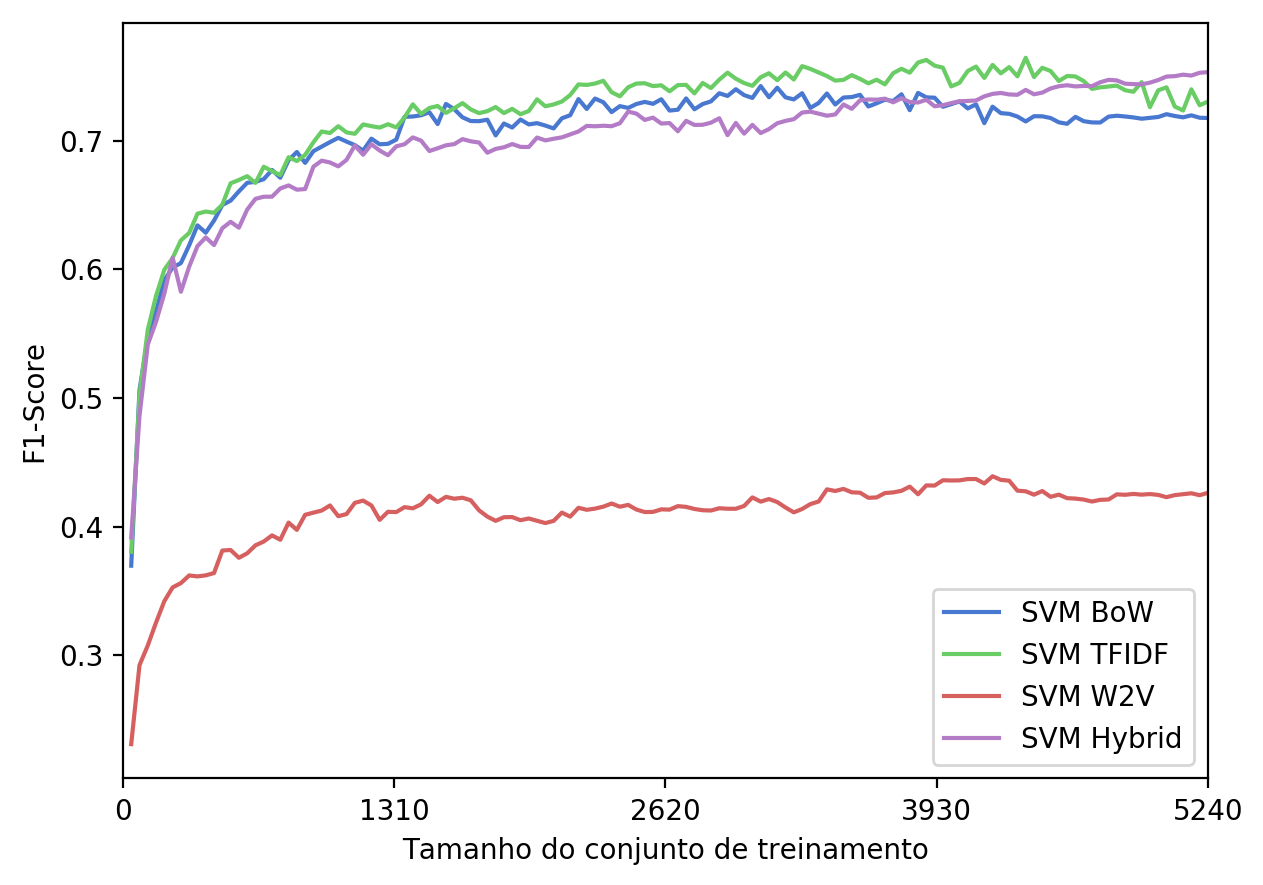

In [345]:
my_plot_(df, metric='f1', ylabel='F1-Score')

In [343]:
df = df[df.Model != 'SVM Hybrid A']

In [260]:
df[df.execution_time > 50]

# 10.988052
# 27.912165

,Model,Unnamed: 0,Unnamed: 0.1,accuracy,confusion,execution_time,f1,precision,recall,test_time,train_size,First Season


In [283]:
df.loc[df['execution_time'] > 50, 'execution_time'] = 27.912165

In [235]:
df[df['Unnamed: 0'] == 210]

,Model,Unnamed: 0,Unnamed: 0.1,accuracy,confusion,execution_time,f1,precision,recall,test_time,train_size
210,SVM W2V,210,NaN,0.508036,[[208.8 17. 5. 10.8 19.6 20. 7.6]\r...,0.75379,0.451451,0.474703,0.467225,0.049662,2120


In [217]:
df

,Model,Unnamed: 0,Unnamed: 0.1,accuracy,classes_order,confusion,execution_time,f1,precision,recall,test_time,train_size
0,SVM BoW,0,NaN,0.463727,NaN,[[4.004e+02 4.880e+01 9.620e+01 9.800e+01 1.00...,0.047771,0.435867,0.447601,0.542999,0.040896,40
1,SVM TFIDF,1,NaN,0.450818,NaN,[[265.6 20.4 22.6 52.6 47. 127.6 6.8]\r...,0.005985,0.433175,0.443732,0.521000,0.027907,40
2,SVM W2V,2,NaN,0.270152,NaN,[[306. 31.6 22.8 22.4 40. 61. 29.4]\r...,0.012578,0.224792,0.251958,0.302565,0.147093,40
3,SVM Hybrid,3,NaN,0.477336,NaN,[[453.4 30.8 65.4 73.6 70.6 237.8 41.8]\r...,0.012172,0.455246,0.462633,0.529058,0.496280,40
4,SVM BoW,4,NaN,0.571809,NaN,[[539.4 68.6 73.4 138.4 158.2 152. 27.4]\r...,0.003192,0.537473,0.546932,0.620842,0.026928,80
5,SVM TFIDF,5,NaN,0.563061,NaN,[[370.6 24.8 21.8 66.8 83. 72.8 6. ]\r...,0.003391,0.539088,0.549771,0.584587,0.028130,80
6,SVM W2V,6,NaN,0.339362,NaN,[[408.8 46.8 39.2 30.6 58.6 68.2 41.4]\r...,0.024334,0.284874,0.313837,0.326754,0.127859,80
7,SVM Hybrid,7,NaN,0.586702,NaN,[[564.8 34.4 43.6 95.4 105.2 202.6 17.4]\r...,0.026547,0.563704,0.568101,0.616831,0.494461,80
8,SVM BoW,8,NaN,0.617524,NaN,[[5.274e+02 4.760e+01 4.220e+01 1.324e+02 1.51...,0.003795,0.585170,0.595953,0.636632,0.027324,120
9,SVM TFIDF,9,NaN,0.627093,NaN,[[446. 16.6 12.6 67. 84.2 82.2 6.4]\r...,0.004390,0.600721,0.610441,0.629514,0.027923,120


In [240]:
df['execution_time'] = df['execution_time'].replace(445.314512, 10.988052)

In [220]:
df['execution_time'] = df[df.execution_time > 445]['execution_time'].replace(10.988052)

In [269]:
df[df.Model == 'RNA W2V']

,Model,Unnamed: 0,Unnamed: 0.1,accuracy,confusion,execution_time,f1,precision,recall,test_time,train_size,First Season
162,RNA W2V,0,0.0,0.179322,[[183. 116.8 104.8 99.6 98.4 72.2 71.8]\r...,11.828439,0.079589,0.164468,0.189804,5.820520,40,NaN
163,RNA W2V,1,1.0,0.276064,[[4.104e+02 1.338e+02 9.980e+01 9.900e+01 1.05...,11.984666,0.170942,0.245662,0.235230,5.854872,80,NaN
164,RNA W2V,2,2.0,0.306758,[[4.180e+02 9.900e+01 6.740e+01 6.520e+01 8.54...,12.187756,0.196233,0.265424,0.283578,5.954840,120,NaN
165,RNA W2V,3,3.0,0.311320,[[4.468e+02 1.040e+02 6.040e+01 5.660e+01 8.10...,12.412690,0.203012,0.270807,0.338784,6.011096,160,NaN
166,RNA W2V,4,4.0,0.343811,[[4.584e+02 9.920e+01 5.820e+01 4.600e+01 7.42...,12.728233,0.236972,0.300606,0.344130,6.048593,200,NaN
167,RNA W2V,5,5.0,0.358685,[[4.366e+02 8.680e+01 5.280e+01 3.360e+01 6.78...,12.953187,0.267664,0.316829,0.338041,6.157930,240,NaN
168,RNA W2V,6,6.0,0.353392,[[436.4 92.2 51.2 36.6 64.4 55.8 39. ]\r...,13.178138,0.271918,0.314883,0.373421,6.198540,280,NaN
169,RNA W2V,7,7.0,0.374046,[[453.4 92.8 55.8 37.2 69.2 55.6 41.6]\r...,13.431202,0.288120,0.331954,0.410835,6.248529,320,NaN
170,RNA W2V,8,8.0,0.378608,[[432.6 60. 43.2 26.8 51.4 40.4 29.6]\r...,13.731130,0.293532,0.334480,0.407548,6.326649,360,NaN
171,RNA W2V,9,9.0,0.384465,[[4.192e+02 5.660e+01 3.960e+01 2.380e+01 4.68...,14.056058,0.296468,0.336568,0.414609,6.382877,400,NaN


### UTIL

In [ ]:
import pandas as pd


qc_lstm = pd.read_csv('lstm_results.csv')

qc_mlp_bow = pd.read_csv('mlp_bow_results.csv')

qc_mlp_hybrid = pd.read_csv('mlp_hybrid_results.csv')

qc_mlp_hybrid_b = pd.read_csv('mlp_hybridb_results.csv')

qc_tfidf = pd.read_csv('mlp_tfidf_results.csv')

qc_w2v = pd.read_csv('mlp_w2v_results.csv')

qc_nbbl = pd.read_csv('nbbl_all_results.csv')

qc_svm = pd.read_csv('qc_svm_results.csv')

qc_mlp = pd.concat([qc_mlp_bow, qc_tfidf, qc_w2v, qc_mlp_hybrid, qc_mlp_hybrid_b])

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools


#classes_ = ['DEFINITION', 'LOCATION', 'MEASURE', 'ORGANIZATION', 'OTHER', 'PERSON', 'TIME']
classes_ =  ['DEFINITION', 'LOCATION', 'MEASURE', 'ORGANIZATION', 'OTHER', 'PERSON', 'TIME']

def plot_confusion_matrices(df):
    
    fig = plt.figure()
    
    coordinates = [(1,2,1), (1,2,2), (1,2,3), (1,2,4)]
    
    for i, model in enumerate(df.Model.unique()):
        #data = df.loc[df[df['Model'] == model]['train_size'].idxmax()]['confusion']
        
        df_ = df.loc[df['train_size'].idxmax()]
        data = df_['confusion'][df_['Model'] == model].values[0].replace('\r\n', '')
        
        #print('\n-', data)
        data = treat_str_confusion(data)
        #print('\n\n--', data,)
        plot_confusion_matrix(data, classes_, coordinates[i], 
                              title='Matriz de confusão - '+model, 
                              path_save='cm_lstm_'+model+'.eps')

    
def plot_confusion_matrix(cm,
                          target_names,
                          coordinate,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues,
                          normalize=True,
                          path_save=None,
                          save_format='eps'):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.figure(figsize=(7, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes_))
    plt.xticks(tick_marks, classes_, rotation=45)
    plt.yticks(tick_marks, classes_)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predida')
    plt.tight_layout()
    if path_save is not None:
        plt.savefig(path_save, dpi=100, format=save_format)
    plt.show()

from ast import literal_eval

def treat_str_confusion(c):
    numbers = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    if 'e' in c:
        c = literal_eval(c.replace(' ', ','))
    else:
        cc = ''
        last = ''
        for s in c:
            if last == '.':
                if s not in numbers:
                    cc += ','
                else:
                    cc += s
            elif last in numbers and not s == '.' and s not in numbers and s not in ']':
                cc += ','
            elif last == ']':
                cc += ','+s
            else:
                cc += s
            last = s 
        c = cc
        c = literal_eval(c)  # .replace(' ', '').replace('.', '.,').replace('\r\n',',')
    cc = []
    for i in c:
        cc.append(np.array(i))
    cc = np.array(cc)
    return cc

Normalized confusion matrix


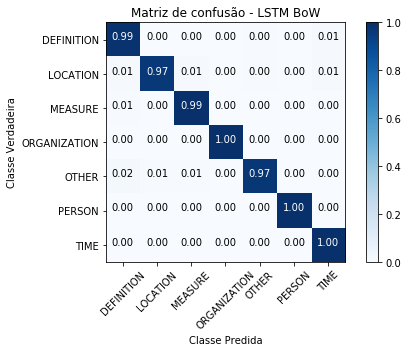

Normalized confusion matrix


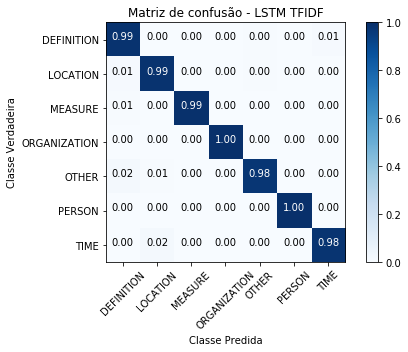

Normalized confusion matrix


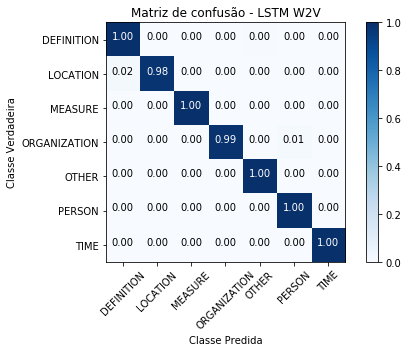

Normalized confusion matrix


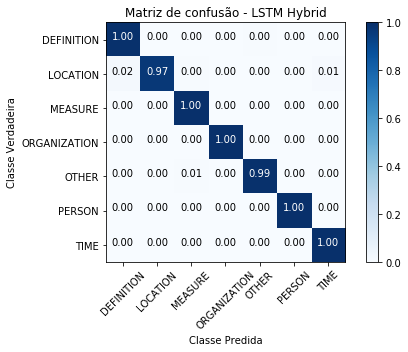

In [172]:
plot_confusion_matrices(df)

In [346]:
df_ = df.loc[df['train_size'].idxmax()]
df_

Unnamed: 0                                                      650
Model                                                       SVM BoW
accuracy                                                     0.8228
classes_order     [array(['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', ...
confusion         [[  1.    1.6   0.    0.    0.    0. ]\r\n [  ...
execution_time                                              0.30462
f1                                                         0.717629
precision                                                   0.70698
recall                                                     0.766562
test_time                                                0.00312188
train_size                                                     5240
Name: 650, dtype: object

In [348]:
df[df.train_size == 5240]

,Unnamed: 0,Model,accuracy,classes_order,confusion,execution_time,f1,precision,recall,test_time,train_size
650,650,SVM BoW,0.8228,"[array(['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', ...",[[ 1. 1.6 0. 0. 0. 0. ]\r\n [ ...,0.304620,0.717629,0.706980,0.766562,0.003122,5240
651,651,SVM TFIDF,0.8274,"[array(['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', ...",[[1.400e+00 1.100e+00 0.000e+00 0.000e+00 0.00...,0.139025,0.730383,0.723749,0.793183,0.003122,5240
652,652,SVM W2V,0.4994,"[array(['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', ...",[[ 2. 2. 0. 0. 0. 0. ]\r\n [ ...,2.465047,0.426315,0.437021,0.471223,0.028112,5240
654,654,SVM Hybrid,0.7964,"[array(['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', ...",[[4.000e+00 1.900e+00 0.000e+00 0.000e+00 1.00...,5.439346,0.753316,0.733228,0.793188,0.079661,5240


### Statistic Test

In [325]:
a = df[df.Model == 'SVM Hybrid']['f1'].values
b = df[df.Model == 'SVM TFIDF']['f1'].values

In [314]:
a

array([0.43586669, 0.53747334, 0.58516979, 0.62091855, 0.64064203,
       0.65943436, 0.67328214, 0.6809973 , 0.68827454, 0.69765878,
       0.7098829 , 0.71630355, 0.71370696, 0.72017155, 0.72314653,
       0.72740795, 0.73076874, 0.73106307, 0.73504847, 0.73378   ,
       0.7384874 , 0.73929935, 0.74653107, 0.7484005 , 0.75110747,
       0.74900992, 0.75465238, 0.75775404, 0.75330302, 0.75803337,
       0.75905571, 0.7569201 , 0.75805304, 0.76142052, 0.75824213,
       0.75849998, 0.76228506, 0.76180511, 0.76460147, 0.76616541,
       0.76570291, 0.76522786, 0.76456166, 0.76737937, 0.77036454,
       0.76851605, 0.77016818, 0.77418909, 0.77672353, 0.77658827,
       0.77604848, 0.77605559, 0.77645869, 0.77995984, 0.78496229,
       0.78507803, 0.7847954 , 0.78217612, 0.78263546, 0.78003482,
       0.78149054, 0.78180772, 0.78489944, 0.78444075, 0.78313077,
       0.78460321, 0.78637349, 0.79126154, 0.79245339, 0.79213865,
       0.79292901, 0.79986559, 0.79829832, 0.7954289 , 0.79678

In [326]:
import scipy.stats

#a = []
#b = []

#for t in df:
#    print(t['Model'])
#    if t['Model'] == 'SVM BoW':
#        a.append(t['f1'])
#    if t['Model'] == 'SVM Hybrid':
#        b.append(t['f1'])

scipy.stats.wilcoxon(a, b)

WilcoxonResult(statistic=0.0, pvalue=5.362626265112969e-15)

In [332]:
import scipy.stats

a = df[df.Model == 'SVM Hybrid']['f1'].values
b = df[df.Model == 'SVM TFIDF']['f1'].values

test_models = ['SVM', 'RNA', 'LSTM']
test_approaches = [('Hybrid', 'BoW'), ('Hybrid', 'TFIDF'), ('Hybrid', 'W2V')]

for m in test_models:
    for a in test_approaches:
        aux1 = m + ' ' + a[0]
        aux2 = m + ' ' + a[1]
        a = df[df.Model == aux1]['f1'].values
        b = df[df.Model == aux2]['f1'].values
        
        print('Test:', aux1, 'e', aux2)
        print(scipy.stats.ttest_ind(a, b))
        print('\n')


Test: SVM Hybrid e SVM BoW
Ttest_indResult(statistic=1.9981939231367192, pvalue=0.04738984625214188)


Test: SVM Hybrid e SVM TFIDF
Ttest_indResult(statistic=1.918317500544592, pvalue=0.056851560047403125)


Test: SVM Hybrid e SVM W2V
Ttest_indResult(statistic=42.69950529023343, pvalue=2.27338580454507e-89)


Test: RNA Hybrid e RNA BoW
Ttest_indResult(statistic=-0.30109788083725025, pvalue=0.763730791571358)


Test: RNA Hybrid e RNA TFIDF
Ttest_indResult(statistic=1.0367273260348642, pvalue=0.3014272371290048)


Test: RNA Hybrid e RNA W2V
Ttest_indResult(statistic=31.874951995623505, pvalue=3.366498532924118e-71)


Test: LSTM Hybrid e LSTM BoW
Ttest_indResult(statistic=2.016887952866799, pvalue=0.04537950303520636)


Test: LSTM Hybrid e LSTM TFIDF
Ttest_indResult(statistic=1.8803410028228156, pvalue=0.06187907842947403)


Test: LSTM Hybrid e LSTM W2V
Ttest_indResult(statistic=-0.1677816461632623, pvalue=0.8669669467652261)




In [317]:
import scipy

In [ ]:
scipy.w